# Table of Content

- [Table of Content](#table-of-content)
- [0-General](#0-general)
  - [Introduction](#introduction)
  - [Objectives](#objective)
  - [Analysis steps](#analysis-steps)
  - [Data dictionary](#data-dictionary)
  - [Acknowledgments](#acknowledgements)
  - [Packages](#packages)
- [1-Data Exploration](#1-data-exploration)
- [2-Data Preprocessing](#2-data-preprocessing)
- [3-Analyses](#3-analyses)
  - [In Depth Exploratory Data Analysis](#in-depth-exploratory-data-analysis)
  - [Attrition Analysis](#attrition-analysis)
  - [Compliance Analysis](#compliance-analysis)
  - [Data Imputation](#data-imputation)
  - [Model](#model)
  - [Assumptions](#assumptions)
- [4-General Conclusion](#3-general-conclusion)

# 0-General
[Back to Table of Content](#table-of-content)
# Exploring the Impact of Kneipp Concept on Kindergarten Children's Health

## Introduction
[Back to Table of Content](#table-of-content)

The Kneipp concept, deeply rooted in Europeans tradition, emphasises holistic health and wellness through five key elements: cold water applications, exerceise, nutrition, herbs, and life balance. While "Kneipp Kindergartens" in Germany and surrounding areas regularyly practice Kneipp applications and activities, the specific health benefits for children remain relatively unexplored.

## Objective
[Back to Table of Content](#table-of-content)

Our primary objective is to examine the impact of implementing a child-friendly Kneipp concept in kindergartens on children's resilience and incidence of infection-related absenteeism over a 12-month period.

Hypotheses:
*Primary Efficacy Hypothesis (Infection Days)*
- Null Hypothesis (H0): Implementation of a child-friendly Kneipp concept does not significantly improve resilience, as indicated by a reduction in infection-related absenteeism after 12 months.
- Alternative Hypothesis (H1): Implementation of a child-friendly Kneipp concept leads to a significant improvement in resilience, evidenced by a reduction in infection-related absenteeism after 12 months.

## Analysis steps
[Back to Table of Content](#table-of-content)

1. **In-Depth Exploratory Data Analysis:** This step involves a detailed examination of the dataset to understand its structure, distribution of key variables, and any potential patterns or relationships within the data. It includes assessing the presence of outliers, visualizing the data through plots or charts, and performing summary statistics to gain insights into the characteristics of the population. The goal is to ensure a thorough understanding of the data before proceeding to more complex analyses.
2. **Attrition Analysis:** Attrition analysis focuses on understanding and evaluating the dropout rates in the study. This involves identifying which participants were lost during the study period and assessing whether this attrition may introduce bias into the results. By examining patterns in the missing data (e.g., whether certain groups or characteristics are associated with higher dropout rates), this analysis ensures that the study's results remain valid and generalizable, despite missing data.
3. **Compliance Analysis:** Compliance analysis assesses the extent to which participants adhered to the intervention or treatment protocols during the study. This includes determining how many participants followed the intended treatment regimen and identifying those who deviated from it. Understanding compliance is critical, as it allows researchers to determine whether the results reflect the effects of the intervention itself or are influenced by differing levels of adherence among participants.
4. **Data Imputation:** Data imputation addresses missing values in the dataset by estimating and filling in these gaps. In this case, multiple imputation is used to generate several complete datasets, which are then analyzed and pooled together to ensure that missing data do not bias the results. This step ensures that the analysis can proceed without being distorted by missing information and maintains the statistical power of the study.
5. **Model:** This step involves fitting the appropriate statistical model to the data. In this case, a negative binomial regression model is used to analyze count data (e.g., the number of sick days) while accounting for overdispersion. The model is designed to predict the outcome of interest based on the intervention and other covariates while controlling for random effects, such as differences between clusters or kindergartens
6. **Assumptions:** Testing the assumptions of the statistical model is essential to validate its use. For the negative binomial regression model, this includes checking for overdispersion, ensuring the residuals are properly distributed (no systematic patterns), and testing for zero inflation. This step ensures that the model is appropriate for the data and that the results of the analysis are reliable and interpretable.

## Data Dictionary
[Back to Table of Content](#table-of-content)

| Variable              | Description                                                    | Data Type |
|-----------------------|----------------------------------------------------------------|-----------|
| Child_ID              | Identifier for each child.                                     | Character (chr) |
| Assessment            | Indicates the assessment number.                               | Numeric (dbl) |
| kindergarten_ID       | Identifier for the kindergarten the child attends.             | Character (chr) |
| sickday_week1_day1    | Presence or sickness or absence of the child on week 1, day 1. | Character (chr) |
| sickday_week1_day2    | Presence or sickness or absence of the child on week 1, day 2. | Character (chr) |
| sickday_week1_day3    | Presence or sickness or absence of the child on week 1, day 3. | Character (chr) |
| sickday_week1_day4    | Presence or sickness or absence of the child on week 1, day 4. | Character (chr) |
| sickday_week1_day5    | Presence or sickness or absence of the child on week 1, day 5. | Character (chr) |
| sickday_week2_day1    | Presence or sickness or absence of the child on week 2, day 1. | Character (chr) |
| sickday_week2_day2    | Presence or sickness or absence of the child on week 2, day 2. | Character (chr) |
| ...                   | ...                                                            | ...       |
| sickday_week6_day1    | Presence or sickness or absence of the child on week 6, day 1. | Character (chr) |
| sickday_week6_day2    | Presence or sickness or absence of the child on week 6, day 2. | Character (chr) |
| sickday_week6_day3    | Presence or sickness or absence of the child on week 6, day 3. | Character (chr) |
| sickday_week6_day4    | Presence or sickness or absence of the child on week 6, day 4. | Character (chr) |
| sickday_week6_day5    | Presence or sickness or absence of the child on week 6, day 5. | Character (chr) |

## Acknowledgements
[Back to Table of Content](#table-of-content)

We extended our gratitude to the entire research group of [Prof. Dr. med. Seifert](https://kinderonkologie.charite.de/forschung/ag_seifert/team/) and all participating kindergartens and participants for their invalubale contributions to this study as well as thanks to the funding agencies. Statistical analysis was conducted by Dr. Steven Schepanski, who also oversaw this notebook.

# Packages
[Back to Table of Content](#table-of-content)

In [164]:
# List of packages
packages <- c("dplyr", "ggplot2", "tidyr", "readr", "purrr", "stringr",
              "lubridate", "data.table", "plyr", "reshape2", "MASS",
              "readxl", "mice", "gridExtra", "rlang", "glmmTMB", "DHARMa")

In [165]:
# Install packages
install.packages(setdiff(packages, rownames(installed.packages())))

In [166]:
# Load packages without printing
invisible(lapply(packages, library, character.only = TRUE))

In [81]:
# Working path
path <- "/Users/stevenschepanski/Documents/04_ANALYSIS/Kneipp"

In [82]:
# Read in data
sickdays_children <- read_csv(file.path(path, "/data/Sickdays_Children.csv"))

Rows: 587 Columns: 33
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (32): Child_ID, kindergarten_ID, sickday_week1_day1, sickday_week1_day2,...
dbl  (1): Assessment

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


# 1-Data Exploration
[Back to Table of Content](#table-of-content)

In [83]:
# Display the first few rows of the DataFrame
head(sickdays_children)

Child_ID,Assessment,kindergarten_ID,sickday_week1_day1,sickday_week1_day2,sickday_week1_day3,sickday_week1_day4,sickday_week1_day5,sickday_week2_day1,sickday_week2_day2,...,sickday_week5_day1,sickday_week5_day2,sickday_week5_day3,sickday_week5_day4,sickday_week5_day5,sickday_week6_day1,sickday_week6_day2,sickday_week6_day3,sickday_week6_day4,sickday_week6_day5
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
MBT305,1,MTB3,present,present,present,present,present,present,present,...,present,present,present,present,absent,present,present,present,present,present
MTB101,1,MTB1,present,present,present,absent,present,present,present,...,present,present,present,present,present,present,NA,NA,NA,NA
MTB101,2,MTB1,present,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
MTB102,1,MTB1,present,present,present,present,present,present,present,...,present,present,present,present,present,present,present,present,present,present
MTB102,2,MTB1,present,present,present,present,present,present,present,...,present,present,present,present,present,present,present,present,present,present
MTB103,1,MTB1,present,present,present,present,present,present,absent,...,present,present,absent,present,present,present,present,present,present,present


In [84]:
# Get and print the dimensions of the DataFrame
num_rows <- nrow(sickdays_children)
num_cols <- ncol(sickdays_children)

print(sprintf("The DataFrame has %d rows and %d columns.", num_rows, num_cols))

[1] "The DataFrame has 587 rows and 33 columns."


In [85]:
# Show the structure of the data
str(sickdays_children, list.len = ncol(sickdays_children))

spc_tbl_ [587 x 33] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Child_ID          : chr [1:587] "MBT305" "MTB101" "MTB101" "MTB102" ...
 $ Assessment        : num [1:587] 1 1 2 1 2 1 2 1 2 1 ...
 $ kindergarten_ID   : chr [1:587] "MTB3" "MTB1" "MTB1" "MTB1" ...
 $ sickday_week1_day1: chr [1:587] "present" "present" "present" "present" ...
 $ sickday_week1_day2: chr [1:587] "present" "present" NA "present" ...
 $ sickday_week1_day3: chr [1:587] "present" "present" NA "present" ...
 $ sickday_week1_day4: chr [1:587] "present" "absent" NA "present" ...
 $ sickday_week1_day5: chr [1:587] "present" "present" NA "present" ...
 $ sickday_week2_day1: chr [1:587] "present" "present" NA "present" ...
 $ sickday_week2_day2: chr [1:587] "present" "present" NA "present" ...
 $ sickday_week2_day3: chr [1:587] "present" "present" NA "present" ...
 $ sickday_week2_day4: chr [1:587] "present" "present" NA "present" ...
 $ sickday_week2_day5: chr [1:587] "present" "present" NA "present" ...
 $ sickday_we

In [86]:
# Recode the columns
sickdays_children <- sickdays_children %>%
  mutate_at(vars(1), as.character) %>%
  mutate_at(vars(2), as.numeric) %>%
  mutate_at(vars(3:33), as.factor)

In [87]:
# Get and print the dimensions of the DataFrame
num_rows <- nrow(sickdays_children)
num_cols <- ncol(sickdays_children)

print(sprintf("The DataFrame has %d rows and %d columns.", num_rows, num_cols))

[1] "The DataFrame has 587 rows and 33 columns."


In [88]:
# Check for duplicates and print their number
duplicates <- sickdays_children %>%
  duplicated() %>%
  sum()

print(sprintf("The DataFrame has %d duplicates.", duplicates))

[1] "The DataFrame has 0 duplicates."


In [89]:
# Change assessment into factors
sickdays_children$Assessment <- as.factor(sickdays_children$Assessment)

In [90]:
# Descriptive statistics
summary(sickdays_children)

   Child_ID         Assessment kindergarten_ID sickday_week1_day1
 Length:587         1:250      RGB2   :118     absent : 57       
 Class :character   2:337      RGB1   :117     present:390       
 Mode  :character              MTB1   : 78     sick   : 50       
                               MZA1   : 68     NA's   : 90       
                               MZA2   : 57                       
                               MTB2   : 46                       
                               (Other):103                       
 sickday_week1_day2 sickday_week1_day3 sickday_week1_day4 sickday_week1_day5
 absent : 61        absent : 61        absent : 56        absent : 76       
 present:381        present:376        present:385        present:357       
 sick   : 52        sick   : 58        sick   : 54        sick   : 62       
 NA's   : 93        NA's   : 92        NA's   : 92        NA's   : 92       
                                                                            
          

The descriptive statistics summarize the sick day patterns of children across different kindergartens over a six-week period, with daily records for each weekday. The data includes a total of 587 children, with 250 assessments in the first group and 337 in the second group. The kindergartens are represented by codes such as RGB1, RGB2, and others, with RGB2 having the highest number of children (118), followed by RGB1 (117).

Regarding sick day status, children were either recorded as "absent," "present," "sick," or marked as missing (NA). Across the six weeks, the majority of children were present on each day, with slightly fluctuating absenteeism and sickness rates. On any given day, about 50-60 children were marked as sick, while a larger proportion, around 350-400, were consistently present. The missing data (NA’s) varied between 90 and 130 records daily, indicating some gaps in the recorded assessments.

There is a noticeable trend of more absences and missing data in later weeks (Week 5 and Week 6), with fewer children recorded as sick compared to earlier weeks. However, no strong variation in sickness rates across different days of the week is immediately apparent. The patterns of absenteeism and presence show relative consistency, with daily fluctuations likely driven by school schedules or potential external factors affecting attendance.

Overall, this dataset provides a clear picture of the day-to-day variations in attendance and sickness among children over the study period, with a consistent majority being present and a small but steady number of sick children each day.

In [91]:
# Subset the data where Assessment is 1
assessment_1_data <- sickdays_children %>%
  filter(Assessment == 1)

# Check for duplicates of Child_ID within Assessment = 1 and print their number
duplicates_assessment_1 <- duplicated(assessment_1_data$Child_ID) %>%
  sum()

print(sprintf("There are %d duplicate Child_IDs in Assessment 1.", duplicates_assessment_1))

[1] "There are 0 duplicate Child_IDs in Assessment 1."


In [92]:
# Count the number of unique Child_IDs within Assessment = 1 and print their number
unique_child_ids_assessment_1 <- assessment_1_data %>%
  summarise(unique_count = n_distinct(Child_ID)) %>%
  pull(unique_count)

print(sprintf("There are %d unique Child_IDs in Assessment 1.", unique_child_ids_assessment_1))

[1] "There are 250 unique Child_IDs in Assessment 1."


In [93]:
# Subset the data where Assessment is 2
assessment_2_data <- sickdays_children %>%
  filter(Assessment == 2)

# Check for duplicates of Child_ID within Assessment = 2 and print their number
duplicates_assessment_2 <- duplicated(assessment_2_data$Child_ID) %>%
  sum()

print(sprintf("There are %d duplicate Child_IDs in Assessment 2.", duplicates_assessment_2))

[1] "There are 0 duplicate Child_IDs in Assessment 2."


In [94]:
# Count the number of unique Child_IDs within Assessment = 2 and print their number
unique_child_ids_assessment_2 <- assessment_2_data %>%
  summarise(unique_count = n_distinct(Child_ID)) %>%
  pull(unique_count)

print(sprintf("There are %d unique Child_IDs in Assessment 2.", unique_child_ids_assessment_2))

[1] "There are 337 unique Child_IDs in Assessment 2."


In [95]:
# Get unique Child_IDs from both assessments
unique_child_ids_assessment_1 <- unique(assessment_1_data$Child_ID)
unique_child_ids_assessment_2 <- unique(assessment_2_data$Child_ID)

In [96]:
# How many unique Child_IDs from Assessment 1 are in Assessment 2?
common_child_ids <- intersect(unique_child_ids_assessment_1, unique_child_ids_assessment_2)
num_common_child_ids <- length(common_child_ids)

print(sprintf("There are %d Child_IDs present in both Assessment 1 and Assessment 2.", num_common_child_ids))

[1] "There are 247 Child_IDs present in both Assessment 1 and Assessment 2."


In [97]:
# How many unique Child_IDs are in Assessment 2 but not in Assessment 1?
unique_in_assessment_2 <- setdiff(unique_child_ids_assessment_2, unique_child_ids_assessment_1)
num_unique_in_assessment_2 <- length(unique_in_assessment_2)

print(sprintf("There are %d unique Child_IDs in Assessment 2 that were not in Assessment 1.", num_unique_in_assessment_2))

[1] "There are 90 unique Child_IDs in Assessment 2 that were not in Assessment 1."


In [98]:
# Count the number of unique Child_IDs within Assessment = 1 and print their number
unique_kindergarten_id <- sickdays_children %>%
  summarise(unique_count = n_distinct(kindergarten_ID)) %>%
  pull(unique_count)

print(sprintf("There are %d unique kindergarten_IDs.", unique_kindergarten_id))

[1] "There are 9 unique kindergarten_IDs."


# 2-Data Preprocessing
[Back to Table of Content](#table-of-content)

To conduct a thorough analysis, the dataset requires preprocessing to generate meaningful statistics and averages. Specifically, we need to perform the following tasks:
- **Average Sick Days Over the 6 Weeks:** Calculate the average number of sick days over the six-week period. This will provide an overall measure of the average sick days per kindergarten.
- **Average Sick Days Per Week Over the 6 Weeks:** Calculate the average sick days per week over the six-week-period.

Additionally, the datset should include and be structured around the following key variables to facilitate analysis:
- `Child_ID`: The unique identifier for each child in the dataset.
- `kindergarten_ID`: The unique identifier for each kindergarten, allowing grouping data by kindergarten.
- `Assessment`: Identifier for baseline (= 1) and 1-year followup (= 2) evaluation.
- `Group`: Identifier for experimental (= 1) and control (= 2) group.
- `sickdays`: The number of sick days, which is crucial for calculating averages and other measures.

In [99]:
# Create the new columns (sickday_count, week1_count, etc.)
sick_children <- sickdays_children %>%
  mutate(
    # Count the number of "sick" entries for each sickday column
    sickday_count = rowSums(dplyr::select(., starts_with("sickday")) == "sick", na.rm = TRUE),
    # Count the number of "sick" entries for each week
    week1_count = rowSums(dplyr::select(., starts_with("sickday_week1")) == "sick", na.rm = TRUE),
    week2_count = rowSums(dplyr::select(., starts_with("sickday_week2")) == "sick", na.rm = TRUE),
    week3_count = rowSums(dplyr::select(., starts_with("sickday_week3")) == "sick", na.rm = TRUE),
    week4_count = rowSums(dplyr::select(., starts_with("sickday_week4")) == "sick", na.rm = TRUE),
    week5_count = rowSums(dplyr::select(., starts_with("sickday_week5")) == "sick", na.rm = TRUE),
    week6_count = rowSums(dplyr::select(., starts_with("sickday_week6")) == "sick", na.rm = TRUE),
    # Extract the number from kindergarten_ID and create the Group column
    Group = as.integer(sub("\\D+", "", kindergarten_ID))
  )


In [100]:
# Select only the necessary columns
sick_children <- sick_children %>%
  dplyr::select(Child_ID, Assessment, kindergarten_ID, sickday_count, 
                week1_count, week2_count, week3_count, week4_count, week5_count, 
                week6_count, Group)

In [101]:
# Recode Assessment and kindergarten_ID as factor
sick_children$Assessment <- as.factor(sick_children$Assessment)
sick_children$kindergarten_ID <- as.factor(sick_children$kindergarten_ID)

In [102]:
# Change Group values where Group equals 3 to 2
sick_children$Group[sick_children$Group == 3] <- 2

In [103]:
#Create a new column 'Cluster' based on the first three letters of 'kindergarten_ID'
sick_children <- sick_children %>%
  mutate(Cluster = substr(kindergarten_ID, 1, 3))

In [104]:
# Function to count participants before and after the intervention
check_group_cluster_comparisons <- function(data) {
  
  # Initialize an empty dataframe to store results
  results <- data.frame(
    Cluster = character(),
    Group = integer(),
    Pre_Intervention_Count = integer(),
    Post_Intervention_Count = integer(),
    Retained_Participants = integer(),
    New_Post_Intervention_Participants = integer()
  )
  
  # Loop over unique clusters
  for (cluster_value in unique(data$Cluster)) {
    
    # Loop over each group within each cluster
    for (group_value in unique(data$Group)) {
      
      # Subset the data for the specified cluster, group, and Assessment = 1 (Pre-Intervention)
      assessment_1_data_cluster <- data %>%
        filter(Assessment == 1, Group == group_value, Cluster == cluster_value)
      
      # Subset the data for the specified cluster, group, and Assessment = 2 (Post-Intervention)
      assessment_2_data_cluster <- data %>%
        filter(Assessment == 2, Group == group_value, Cluster == cluster_value)
      
      # Get unique Child_IDs from both assessments for the group and cluster
      unique_child_ids_assessment_1 <- unique(assessment_1_data_cluster$Child_ID)
      unique_child_ids_assessment_2 <- unique(assessment_2_data_cluster$Child_ID)
      
      # Count the participants
      pre_intervention_count <- length(unique_child_ids_assessment_1)  # Pre-intervention
      post_intervention_count <- length(unique_child_ids_assessment_2)  # Post-intervention
      
      # How many unique Child_IDs from Assessment 1 are also in Assessment 2 (Retained participants)
      retained_child_ids <- intersect(unique_child_ids_assessment_1, unique_child_ids_assessment_2)
      retained_count <- length(retained_child_ids)
      
      # How many unique Child_IDs are in Assessment 2 but not in Assessment 1 (New participants)
      new_in_assessment_2 <- setdiff(unique_child_ids_assessment_2, unique_child_ids_assessment_1)
      new_participants_count <- length(new_in_assessment_2)
      
      # Store the results in a clearer format
      results <- rbind(results, data.frame(
        Cluster = cluster_value,
        Group = group_value,
        Pre_Intervention_Count = pre_intervention_count,
        Post_Intervention_Count = post_intervention_count,
        Retained_Participants = retained_count,
        New_Post_Intervention_Participants = new_participants_count
      ))
    }
  }
  
  return(results)
}


In [105]:
# Apply the function to get the comparison results
comparison_results <- check_group_cluster_comparisons(sick_children)

# Print the results for review
comparison_results

Cluster,Group,Pre_Intervention_Count,Post_Intervention_Count,Retained_Participants,New_Post_Intervention_Participants
<chr>,<dbl>,<int>,<int>,<int>,<int>
MTB,2,40,49,39,10
MTB,1,36,42,34,8
MZA,2,23,34,23,11
MZA,1,29,39,29,10
PBB,2,8,22,8,14
PBB,1,11,19,11,8
RGB,2,52,66,52,14
RGB,1,51,66,51,15


In [106]:
# Identify the unique Child_IDs who were present in Assessment 1 (pre-intervention)
unique_child_ids_assessment_1 <- unique(sick_children %>%
  filter(Assessment == 1) %>%
  pull(Child_ID))

In [107]:
# Filter the sick_children data frame to keep only those Child_IDs who were present in Assessment 1
sick_children <- sick_children %>%
  filter(Child_ID %in% unique_child_ids_assessment_1)

# 3-Analyses

## In-Depth Exploratory Data Analysis
[Back to Table of Content](#table-of-content)

In the Exploratory Data Analysis (EDA), the data will be on examined based on distribution, investigating the correlation among variables, and exploring the connection between them and the target variable. I will commence by scrutinizing the data distribution, and subsequently, I will delve into the relationship between the target and the independent variables. This part of the analysis will incoporate all observed data point.

In [108]:
# Increase the width and height of the plot
options(repr.plot.width = 20, repr.plot.height = 30)

# Save the original plot size options
original_width <- getOption("repr.plot.width")
original_height <- getOption("repr.plot.height")

# Increase the base font size
theme_set(theme_bw(base_size = 20))

In [109]:
# Define the column names
columns <- c("sickday_count", "week1_count", "week2_count", "week3_count", "week4_count", "week5_count", "week6_count")

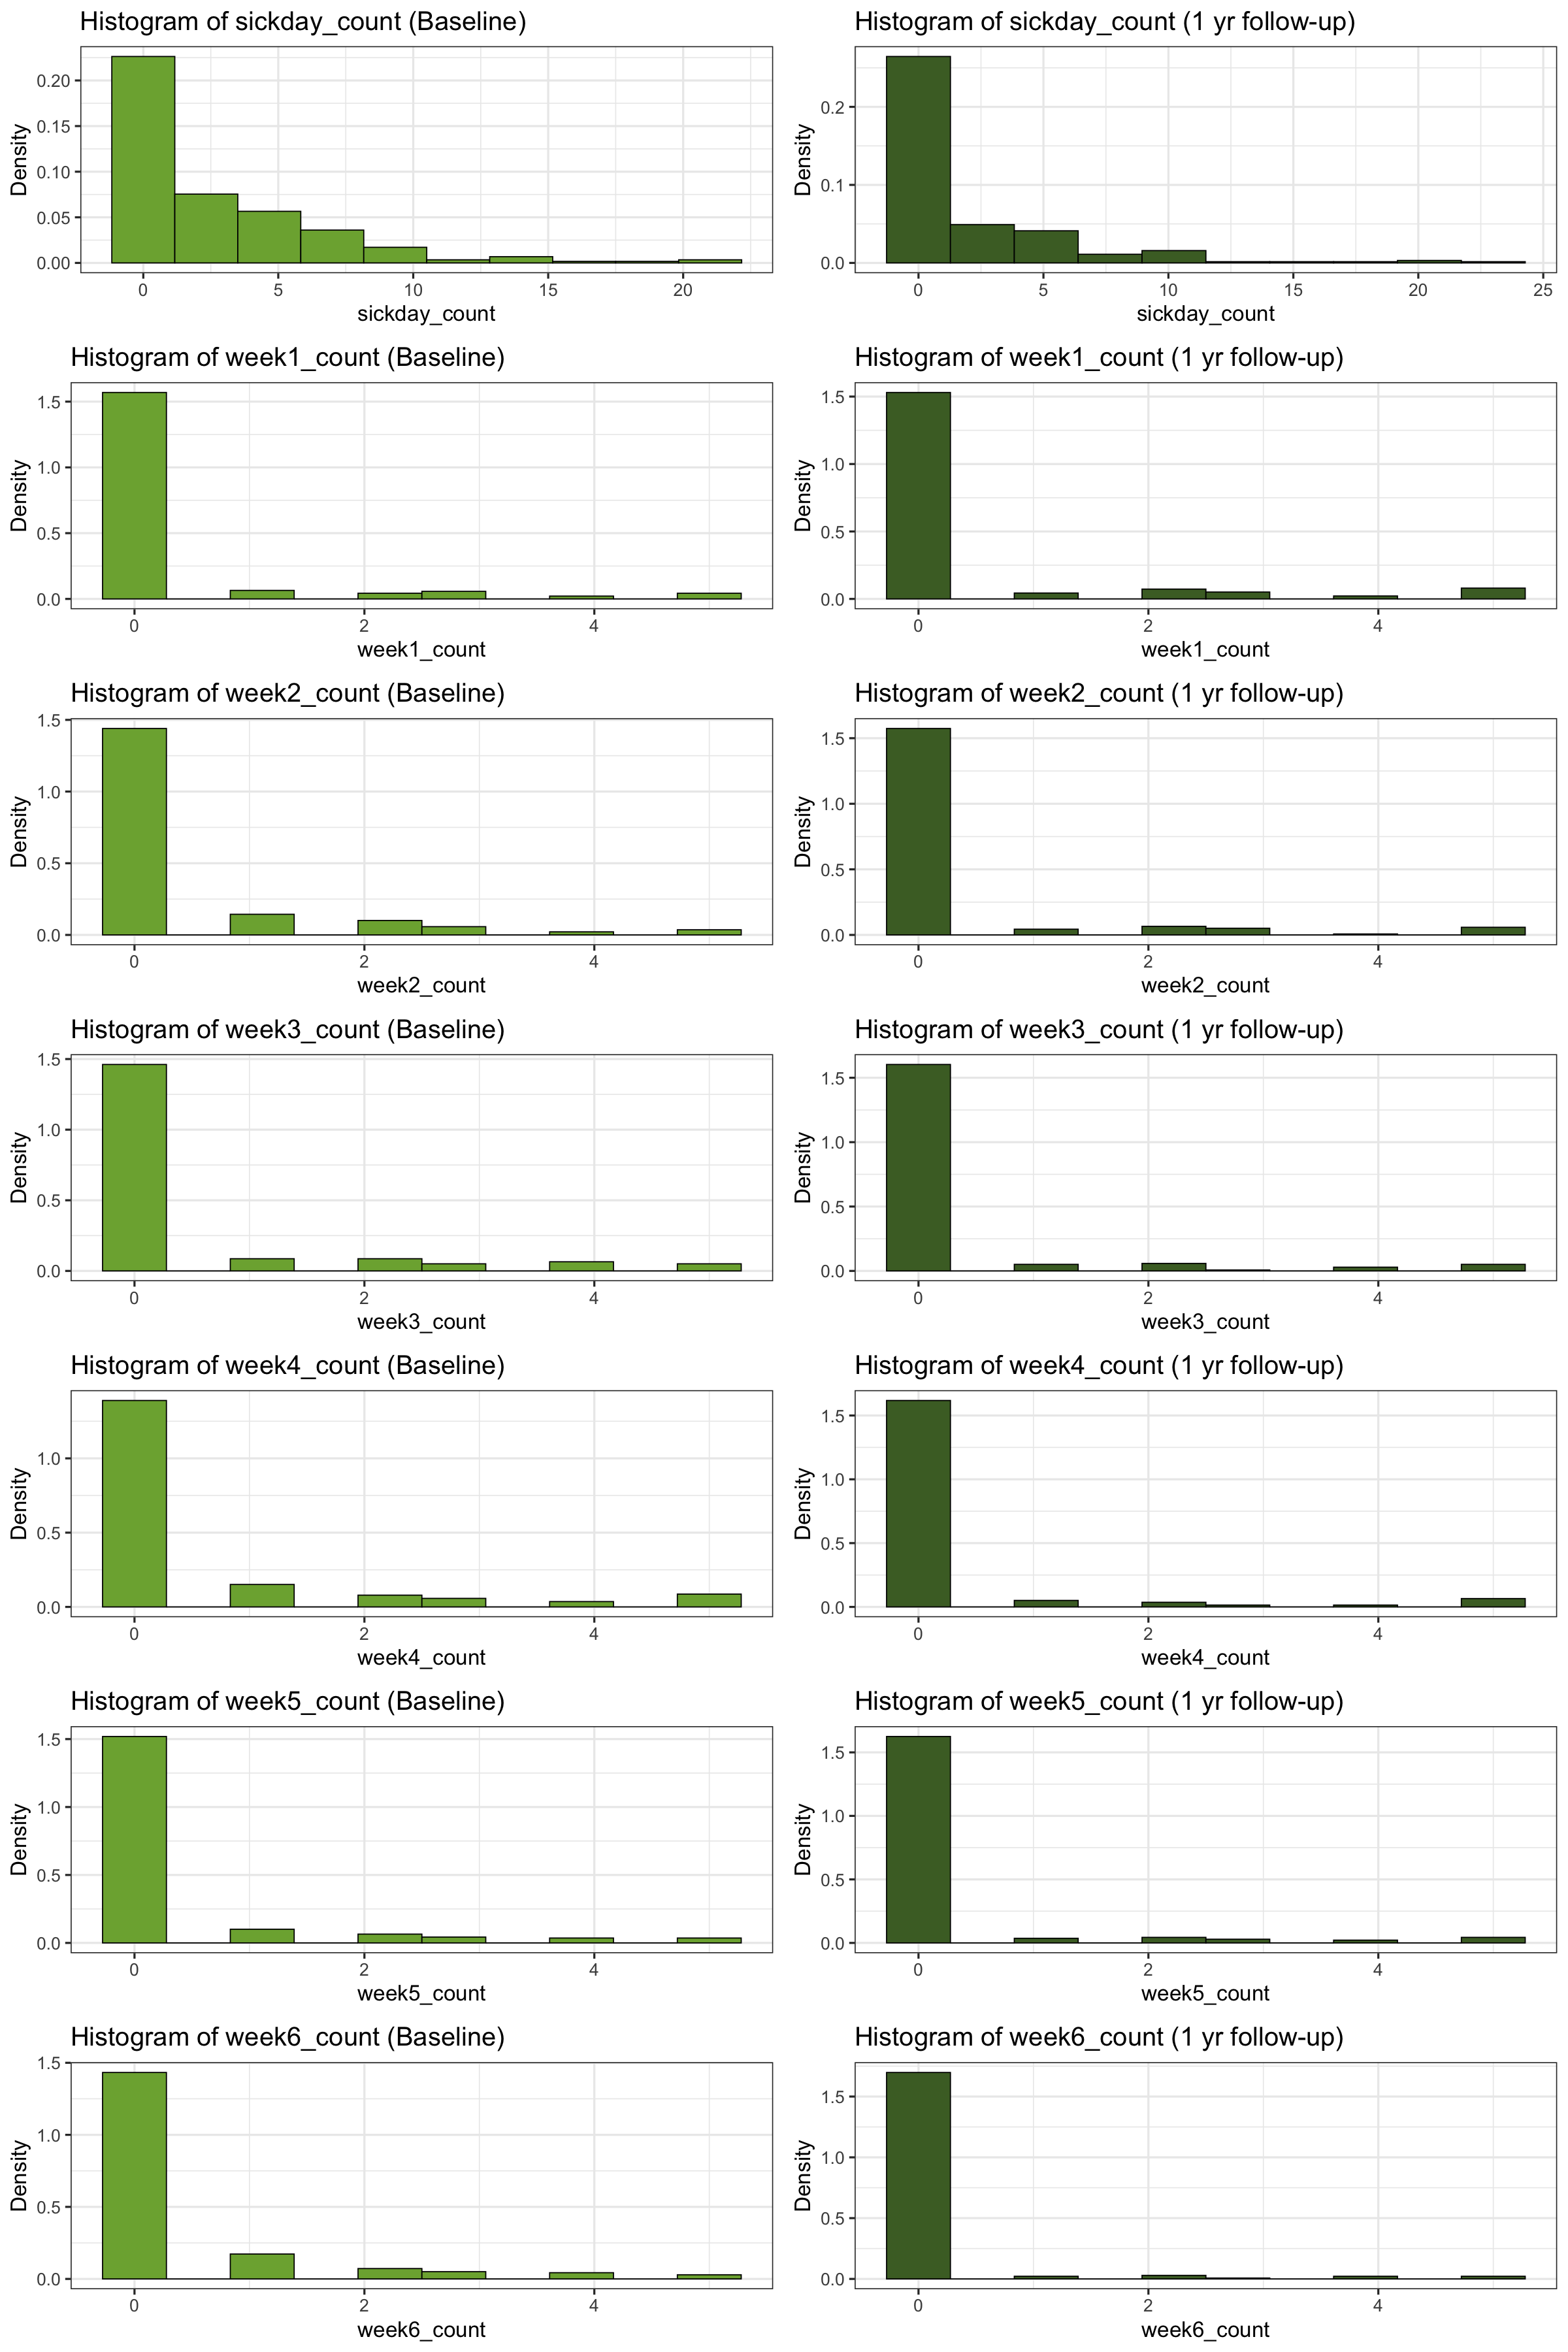

In [110]:
# Create the histograms for assessment = 1 (Baseline)
histograms_baseline <- map(
    columns,
    ~ ggplot(sick_children[sick_children$Assessment == 1, ], aes(!!sym(.x))) +
        geom_histogram(fill = "#7cad3e", color = "black", bins = 10, aes(y = after_stat(density))) +
        labs(title = paste("Histogram of", .x, "(Baseline)"), x = .x, y = "Density")
)

# Create the histograms for assessment = 2 (1 yr follow-up)
histograms_followup <- map(
    columns,
    ~ ggplot(sick_children[sick_children$Assessment == 2, ], aes(!!sym(.x))) +
        geom_histogram(fill = "#4a6c2f", color = "black", bins = 10, aes(y = after_stat(density))) +
        labs(title = paste("Histogram of", .x, "(1 yr follow-up)"), x = .x, y = "Density")
)

# Combine the histograms in a grid
grid.arrange(grobs = c(rbind(histograms_baseline, histograms_followup)), ncol = 2)

Looking at the histograms presented, we can observe the distributions of several variables—such as sick days and weekly counts—at two time points: baseline and after a one-year follow-up.

The sick day count at both baseline and follow-up shows a clear right-skewed distribution, with the majority of individuals having a low count of sick days, and a progressively smaller number reporting higher counts. The density remains highest at zero, gradually tapering off as the sick day count increases. There is not a dramatic difference between the baseline and follow-up distributions, suggesting that the overall number of sick days for the population did not shift significantly over the year.

The weekly counts for each of the six weeks at both baseline and follow-up exhibit a similar pattern, showing highly right-skewed distributions. For each of these weekly counts, the majority of values are concentrated around zero, with very few cases exceeding two or more occurrences. The follow-up distributions resemble the baseline in each case, with minimal changes in the density peaks and tails.

Overall, the histograms suggest that the general behavior of the population regarding sick days and weekly counts remained stable over time. There are no clear signs of substantial changes or trends in either direction between baseline and the one-year follow-up, indicating consistency in the data patterns.

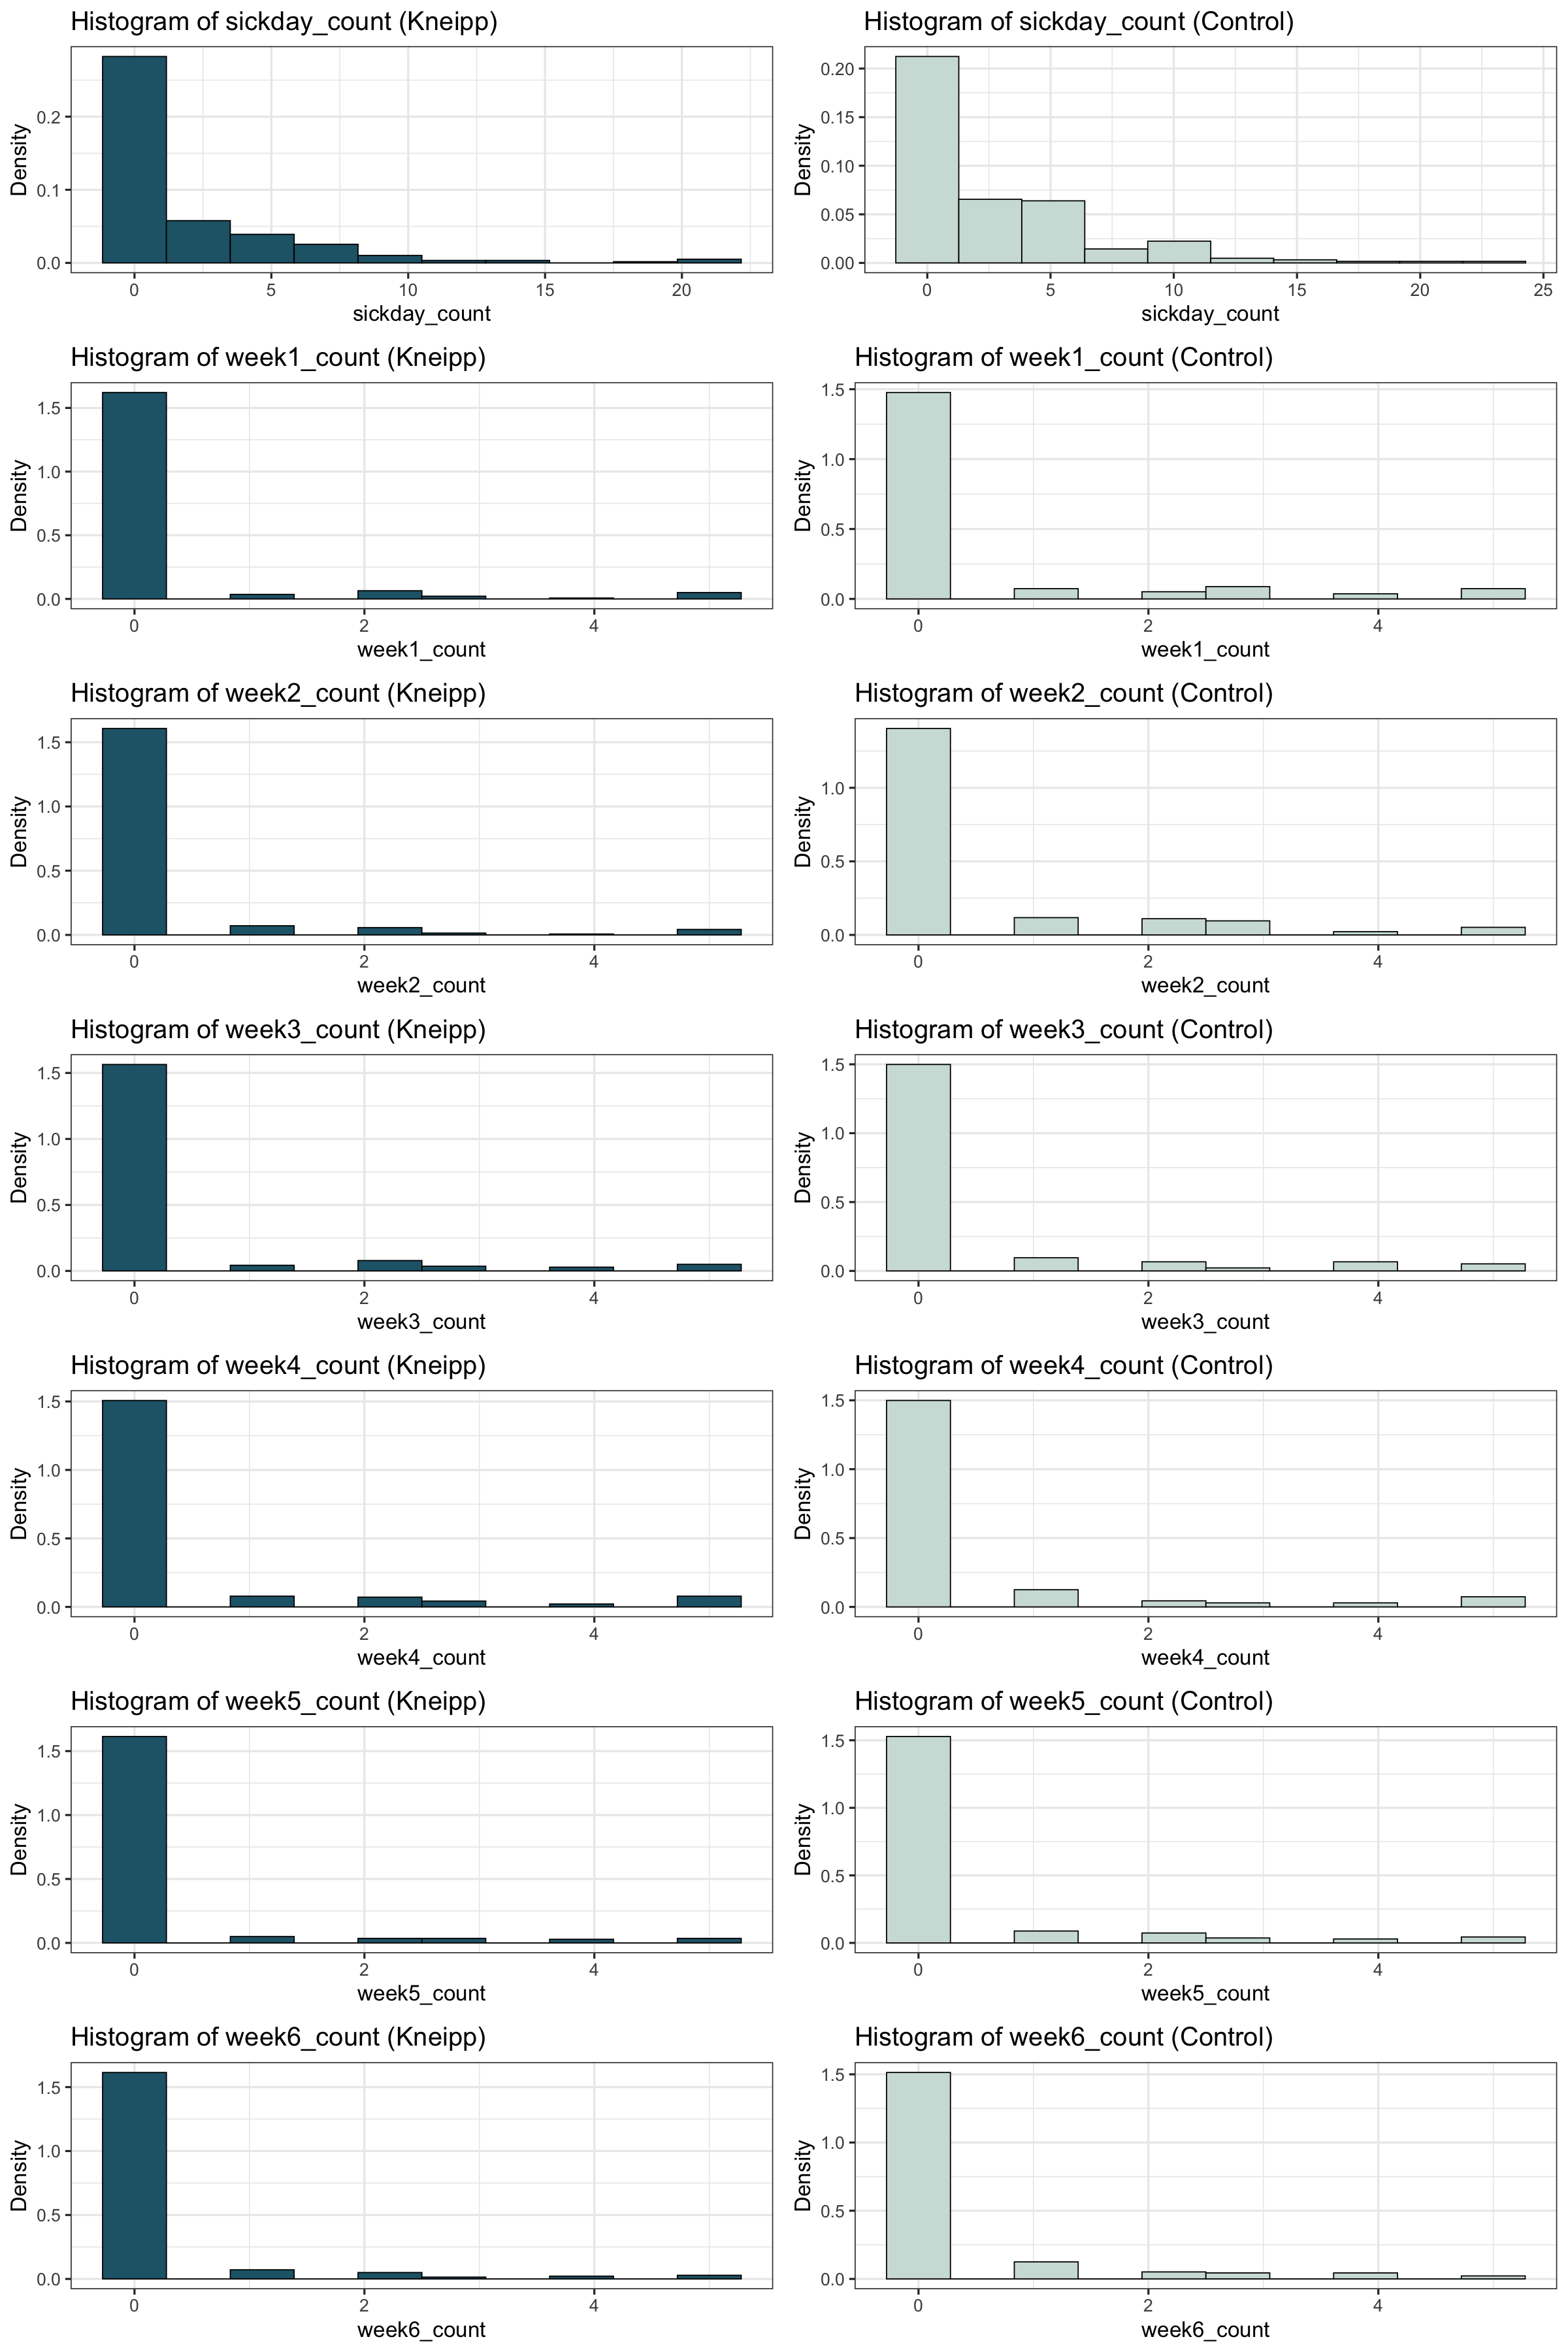

In [111]:
# Create the histograms for Group = 1
histograms_group1 <- map(
    columns,
    ~ ggplot(sick_children[sick_children$Group == 1, ], aes(!!sym(.x))) +
        geom_histogram(fill = "#236477", color = "black", bins = 10, aes(y = after_stat(density))) +
        # geom_density(color = "blue", alpha = 0.5, linewidth = 1.5) +
        labs(title = paste("Histogram of", .x, "(Kneipp)"), x = .x, y = "Density")
)

# Create the histograms for Group = 2
histograms_group2 <- map(
    columns,
    ~ ggplot(sick_children[sick_children$Group == 2, ], aes(!!sym(.x))) +
        geom_histogram(fill = "#cfdfda", color = "black", bins = 10, aes(y = after_stat(density))) +
        # geom_density(color = "red", alpha = 0.5, linewidth = 1.5) +
        labs(title = paste("Histogram of", .x, "(Control)"), x = .x, y = "Density")
)

# Combine the histograms in a grid
grid.arrange(grobs = c(rbind(histograms_group1, histograms_group2)), ncol = 2)

In these histograms, the distributions of sick days and weekly counts are compared between two groups: Kneipp and Control. Both groups show highly right-skewed distributions across all variables, with most of the counts concentrated around zero.

For the sick day count, both the Kneipp and Control groups display a similar pattern. The majority of individuals in both groups have a low number of sick days, with a small number of cases reporting higher counts. The density remains highest at zero, with the frequency diminishing as the sick day count increases. Although the two groups are visually similar in this respect, there might be subtle differences in the density spread, which would need to be confirmed through statistical analysis.

Regarding the weekly counts (week 1 through week 6), both groups show right-skewed distributions, with most values clustered around zero. This indicates that, in both the Kneipp and Control groups, the majority of participants reported few or no events in each of the weeks. Across all six weeks, there are no drastic shifts in the distribution between the groups, implying that the general pattern of weekly occurrences remains consistent.

Comparing the two groups, the Control group’s distribution appears slightly more spread out in the weekly counts, particularly in the higher count ranges. However, as the visual differences are minimal, further analysis is required to determine if there are any statistically significant variations between the two groups.

In summary, both the Kneipp and Control groups exhibit similar distribution patterns for both sick day counts and weekly counts, with no substantial differences visible at first glance. Further statistical tests would be needed to investigate whether these visual observations hold any significant meaning.

## Attrition Analysis
[Back to Table of Content](#table-of-content)

This analysis helps us understand the extent and patterns of participant droput or exit from the study, which can affect the validity of the study's results. It also allows us to assess whether attrition is similar across groups (experimental and control) and whether it might introduce bias.

In [112]:
# Function to calculate attrition rates by `Group`
attrition_analysis <- function(data) {
    # Calculate attrition rates separately for each group
    data %>%
        summarise(
            # Calculate the number of unique children (`Child_ID`) at baseline (`Assessment` == 1)
            baseline_count = n_distinct(Child_ID[Assessment == 1]),
            # Calculate the number of unique children (`Child_ID`) at follow-up (`Assessment` == 2)
            followup_count = n_distinct(Child_ID[Assessment == 2]),
            # Calculate the attrition rate for each group
            attrition_rate = ((baseline_count - followup_count) / baseline_count) * 100
        )
}


In [113]:
# Perform attrition analysis for the Kneipp intervention group
attrition_results <- sick_children %>%
    filter(Group == 1) %>%
    attrition_analysis()

# Display the attrition results
print(attrition_results)

  baseline_count followup_count attrition_rate
1            127            125       1.574803


In [114]:
# Perform attrition analysis for the Kneipp control group and print it
attrition_results <- sick_children %>%
    filter(Group == 2) %>%
    attrition_analysis()

print(attrition_results)

  baseline_count followup_count attrition_rate
1            123            122      0.8130081


For the Kneipp intervention group, there were 127 unique children at baseline (Assessment 1), and 125 children at follow-up (Assessment 2). The attrition rate for this group is calculated as approximately 1.57%, indicating that a very small proportion of children (just two) did not complete the follow-up.

Similarly, in the Kneipp control group, there were 123 children at baseline, and 122 children at follow-up, resulting in an attrition rate of around 0.81%. This shows that only one child from the control group was lost between baseline and follow-up.

Overall, the attrition rates for both groups are very low, suggesting minimal participant loss over time, which supports the validity of the findings. 

## Compliance Analysis
[Back to Table of Content](#table-of-content)

Compliance analysis helps us assess how well participants adhered to the study protocol. By understanding compliance, we can better interpret the study results and ensure that any differences observed are not due to variations in adherence across groups.

In [115]:
# Function to calculate compliance
compliance_analysis <- function(data, total_weeks = 6, days_per_week = 5) {
  total_possible_days <- total_weeks * days_per_week
  
  # Calculate compliance for each child
  data <- data %>%
    mutate(
      compliance = (total_possible_days - sickday_count) / total_possible_days
    )
  
  # Calculate mean compliance for each group
  mean_compliance <- data %>%
    group_by(Group) %>%
    dplyr::summarize(mean_compliance = mean(compliance, na.rm = TRUE) * 100)
  
  return(mean_compliance)
}

In [116]:
# Perform compliance analysis and output results
compliance_results <- compliance_analysis(sick_children)
print(compliance_results)

# A tibble: 2 x 2
  Group mean_compliance
  <dbl>           <dbl>
1     1            93.6
2     2            91.0


For Group 1 (Kneipp intervention), the mean compliance rate is 93.6%, indicating that, on average, participants in this group followed the intervention protocol with a high level of adherence. This suggests that the majority of participants in the intervention group actively participated and engaged with the prescribed activities or treatments.

In Group 2 (Kneipp control), the mean compliance rate is 91.0%, which is also quite high, though slightly lower than the intervention group. This indicates that the control group also maintained a strong level of adherence to the study protocols, though with a marginally lower average compliance compared to the intervention group.

Overall, both groups exhibit high compliance rates, demonstrating that participants in both the intervention and control groups were highly engaged with the study.

## Data Imputation
[Back to Table of Content](#table-of-content)

We have identified that 2 children are not present at the 1 year follow up in the Kneipp group and 1 child is not present anymore in the control group. Given that the reason for dropout is likely unrelated to the outcome (i.e., transitioning to primary school), using a method such as multiple imputation to estimate the missing data would be a reasonable approach. This ensures that you retain the statistical power of your dataset without introducing bias.

In [117]:
# Drop unnecessary columns
sick_children <- sick_children %>%
  dplyr::select(-week1_count, -week2_count, -week3_count, -week4_count, -week5_count, -week6_count)

In [118]:
# Identify the children at baseline (Assessment == 1)
baseline_children <- sick_children %>%
  filter(Assessment == 1) %>%
  dplyr::select(Child_ID)

In [119]:
# Identify the children at follow-up (Assessment == 2)
followup_children <- sick_children %>%
  filter(Assessment == 2) %>%
  dplyr::select(Child_ID)

In [120]:
# Find the children present at baseline but missing from follow-up
lost_to_followup <- anti_join(baseline_children, followup_children, by = "Child_ID")

In [121]:
# Ensure the Assessment column in the new rows is a factor
lost_to_followup_entries <- sick_children %>%
  filter(Child_ID %in% lost_to_followup$Child_ID & Assessment == 1) %>%
  mutate(
    Assessment = factor(2, levels = levels(sick_children$Assessment)),
    sickday_count = NA,
    kindergarten_ID = kindergarten_ID
  )

In [122]:
# Bind the new entries with the original data
sick_children <- bind_rows(sick_children, lost_to_followup_entries)

In [123]:
# Perform multiple imputation using Predictive Mean Matching (PMM)
imputed_data <- mice(sick_children,
                     m = 5,
                     method = 'pmm',
                     maxit = 50,
                     seed = 123)



 iter imp variable
  1   1  sickday_count
  1   2  sickday_count
  1   3  sickday_count
  1   4  sickday_count
  1   5  sickday_count
  2   1  sickday_count
  2   2  sickday_count
  2   3  sickday_count
  2   4  sickday_count
  2   5  sickday_count
  3   1  sickday_count
  3   2  sickday_count
  3   3  sickday_count
  3   4  sickday_count
  3   5  sickday_count
  4   1  sickday_count
  4   2  sickday_count
  4   3  sickday_count
  4   4  sickday_count
  4   5  sickday_count
  5   1  sickday_count
  5   2  sickday_count
  5   3  sickday_count
  5   4  sickday_count
  5   5  sickday_count
  6   1  sickday_count
  6   2  sickday_count
  6   3  sickday_count
  6   4  sickday_count
  6   5  sickday_count
  7   1  sickday_count
  7   2  sickday_count
  7   3  sickday_count
  7   4  sickday_count
  7   5  sickday_count
  8   1  sickday_count
  8   2  sickday_count
  8   3  sickday_count
  8   4  sickday_count
  8   5  sickday_count
  9   1  sickday_count
  9   2  sickday_count
  9   3  sickd

Warning message:
"Number of logged events: 252"


In [124]:
# View a summary of the imputed data
summary(imputed_data)

Class: mids
Number of multiple imputations:  5 
Imputation methods:
       Child_ID      Assessment kindergarten_ID   sickday_count           Group 
             ""              ""              ""           "pmm"              "" 
        Cluster 
             "" 
PredictorMatrix:
                Child_ID Assessment kindergarten_ID sickday_count Group Cluster
Child_ID               0          1               1             1     1       0
Assessment             0          0               1             1     1       0
kindergarten_ID        0          1               0             1     1       0
sickday_count          0          1               1             0     1       0
Group                  0          1               1             1     0       0
Cluster                0          1               1             1     1       0
Number of logged events:  252 
  it im           dep     meth      out
1  0  0               constant Child_ID
2  0  0               constant  Cluster
3  1  1 

The multiple imputation using Predictive Mean Matching (PMM) was performed to handle missing data in the variable sickday_count. A total of five imputations were generated, with each imputation iterating 50 times to ensure the best possible predictions for missing values. The imputation process focused specifically on sickday_count, as indicated by the use of the PMM method, which is effective in preserving the distribution of the original data.

The predictive model used a matrix of predictors, including variables such as Assessment, kindergarten_ID, Group, and Cluster, to estimate the missing values for sickday_count. The other variables, such as Child_ID and Cluster, were treated as constant and were not imputed. The approach ensures that the imputed values are plausible within the context of the observed data, as PMM matches observed values closely to replace missing ones.

Overall, the imputation was successful, with 252 events logged during the process, indicating the method effectively handled the missing data while maintaining the relationships between variables.

In [125]:
# Extract the completed dataset with imputed values and save it in a new object
completed_data <- complete(imputed_data)

## Model
[Back to Table of Content](#table-of-content)

When analyzing count data, such as the number of sick days, it is common to encounter overdispersion—where the variance of the data exceeds its mean. In such cases, traditional Poisson regression models, which assume that the mean and variance are equal, become inadequate. This assumption can lead to underestimating the standard errors and biased inference, resulting in misleading conclusions.

To address this issue, models that account for overdispersion are often applied. One widely used approach is the negative binomial generalized linear model (GLM), which extends the Poisson model by introducing an additional parameter to capture the overdispersion. This extra parameter allows the variance to be greater than the mean, making the model more flexible in handling data where the variability is not constant.

The negative binomial model assumes that the underlying count data follows a Poisson distribution with a stochastic component that varies between observations. This variability is modeled through the introduction of a gamma-distributed random effect. As a result, the negative binomial model can accommodate data where there are more extreme values—such as a higher-than-expected number of zero sick days or an unexpectedly large number of sick days in some individuals—without sacrificing accuracy.

In [126]:
# Function to calculate variance-to-mean ratio for each imputed dataset
calc_var_mean_ratio <- function(dataset) {
  dataset %>%
    dplyr::summarise(
      variance = var(sickday_count, na.rm = TRUE),
      mean = mean(sickday_count, na.rm = TRUE),
      ratio = variance / mean
    )
}

In [127]:
# Apply the function to each imputed dataset and store results
imputed_datasets <- list()

for (i in 1:5) {  # We have 5 imputations based on the original `m = 5`
  imputed_dataset <- complete(imputed_data, action = i)
  imputed_datasets[[i]] <- calc_var_mean_ratio(imputed_dataset)
}

In [128]:
# Combine the results into a single data frame
results_combined <- bind_rows(imputed_datasets)

In [129]:
# Calculate and display the pooled mean for variance-to-mean ratio across all imputations
pooled_results <- summarise(results_combined,
                            pooled_variance = mean(variance),
                            pooled_mean = mean(mean),
                            pooled_ratio = mean(ratio))

print(pooled_results)

  pooled_variance pooled_mean pooled_ratio
1        13.98211      2.2868     6.114272


The analysis of the imputed datasets reveals important insights into the distribution of sick day counts. The pooled variance is 13.98, which is significantly higher than the pooled mean of 2.29. This results in a variance-to-mean ratio of approximately 6.11. Such a high ratio indicates strong overdispersion in the data, meaning that the variance far exceeds the mean.

In [130]:
# Function to calculate the proportion of zeros in the 'sickday_count' column
calc_zero_proportion <- function(dataset) {
  summarise(dataset,
            zeros = mean(sickday_count == 0, na.rm = TRUE))
}

In [131]:
# Apply the function to each imputed dataset and store results
imputed_zero_proportions <- list()

for (i in 1:5) {  # Loop through all 5 imputations
  imputed_dataset <- complete(imputed_data, action = i)
  imputed_zero_proportions[[i]] <- calc_zero_proportion(imputed_dataset)
}

In [132]:
# Combine the results into a single data frame
zero_proportions_combined <- bind_rows(imputed_zero_proportions)

# Calculate and display the pooled mean for the proportion of zeros across all imputations
pooled_zero_proportion <- summarise(zero_proportions_combined,
                                    pooled_zeros = mean(zeros))

print(pooled_zero_proportion)

  pooled_zeros
1       0.5256


The analysis shows that 52.6% of the sickday_count values are zeros, indicating that more than half of the children had no recorded sick days. Additionally, the variance-to-mean ratio of approximately 6.11 highlights significant overdispersion in the data, where the variance far exceeds the mean.

These two factors—overdispersion and the substantial proportion of zeros—strongly suggest that a negative binomial regression model is the most appropriate choice for analyzing the data. The negative binomial model accounts for overdispersion by introducing an extra parameter to handle the variance, and it naturally accommodates the presence of zeros without the need for zero-inflated modifications. Thus, it offers a robust framework for analyzing sick day counts, ensuring both the overdispersed nature and the zero-heavy distribution of the data are appropriately addressed.

In [133]:
# Convert imputed data to long format
long_imputed_data <- complete(imputed_data, action = "long", include = FALSE)

In [134]:
# Define the function to separate and merge baseline and follow-up data
process_long_imputed_data <- function(data) {
  # Separate baseline (Assessment = 1)
  baseline_data <- data %>%
    dplyr::filter(Assessment == 1) %>%
    dplyr::select(Child_ID, kindergarten_ID, sickday_count, Group, Cluster, .imp) %>%
    dplyr::rename(sickday_count_1 = sickday_count, Cluster_1 = Cluster)
  
  # Separate follow-up (Assessment = 2)
  followup_data <- data %>%
    dplyr::filter(Assessment == 2) %>%
    dplyr::select(Child_ID, kindergarten_ID, sickday_count, Group, Cluster, .imp) %>%
    dplyr::rename(sickday_count_2 = sickday_count, Cluster_2 = Cluster)
  
  # Merge baseline and follow-up data
  merged_data <- followup_data %>%
    dplyr::left_join(baseline_data, by = c("Child_ID", "kindergarten_ID", ".imp"))
  
  return(merged_data)
}

In [135]:
# Apply the function to the long-format data
merged_long_data <- process_long_imputed_data(long_imputed_data)

In [136]:
# Clean up redundant columns
merged_imputed_data <- merged_long_data %>%
  dplyr::select(Child_ID, kindergarten_ID, .imp, sickday_count_1, sickday_count_2, Group = Group.x, Cluster_1, Cluster_2)

In [137]:
# Split the long data by imputation number (.imp)
split_imputed_data <- split(merged_imputed_data, merged_imputed_data$.imp)

In [138]:
# Fit the Negative Binomial GLMM with a quadratic term for sickday_count_1
model_results <- lapply(split_imputed_data, function(data) {
  glmmTMB(sickday_count_2 ~ Group + sickday_count_1 + I(sickday_count_1^2) + 
          (1 | Cluster_1/Group) + (1 | kindergarten_ID),
          data = data,
          family = nbinom2)
})

In [139]:
# Extract the coefficients, variance-covariance matrices, random effects, and confidence intervals from each model
model_summaries <- lapply(model_results, function(model) {
  summary_model <- summary(model)
  
  # Extract coefficients (fixed effects)
  coefs <- summary_model$coefficients$cond
  
  # Extract the variance-covariance matrix and ensure it's a numeric matrix
  var_covar <- as.matrix(vcov(model)$cond)  # Extract 'cond' part and convert to matrix if necessary
  
  # Extract random effects (variance and standard deviation)
  random_effects <- VarCorr(model)$cond
  
  # Extract confidence intervals for fixed effects
  conf_intervals <- confint(model, parm = "beta_", level = 0.95)  # 95% confidence intervals
  
  list(coefs = coefs, var_covar = var_covar, random_effects = random_effects, conf_intervals = conf_intervals)
})

In [140]:
# Define a function to pool the fixed effects and confidence intervals across imputed datasets
pool_results <- function(model_summaries) {
  
  # Extract fixed effects (coefficients) from each imputation
  coefs_list <- lapply(model_summaries, function(x) x$coefs)
  
  # Extract confidence intervals from each imputation
  ci_list <- lapply(model_summaries, function(x) x$conf_intervals)
  
  # Pool coefficients (average the estimates and calculate pooled SE)
  pooled_coefs <- Reduce("+", coefs_list) / length(coefs_list)
  
  # Pool confidence intervals (average of lower and upper bounds)
  pooled_ci <- Reduce("+", ci_list) / length(ci_list)
  
  return(list(pooled_coefs = pooled_coefs, pooled_ci = pooled_ci))
}

In [141]:
# Apply the pooling function to the model summaries
pooled_fixed_effects <- pool_results(model_summaries)

In [142]:
# Output pooled fixed effects and confidence intervals
pooled_fixed_effects$pooled_coefs
pooled_fixed_effects$pooled_ci

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-0.824904068,0.500721097,-1.6472471,0.099676285
Group,0.749800608,0.288732192,2.5968014,0.009421438
sickday_count_1,0.095193653,0.089033773,1.0691317,0.285068991
I(sickday_count_1^2),-0.002540395,0.005238556,-0.4849086,0.627767116


,2.5 %,97.5 %,Estimate
(Intercept),-1.80629938,0.156491248,-0.824904068
Group,0.18389591,1.315705305,0.749800608
sickday_count_1,-0.07930934,0.269696643,0.095193653
I(sickday_count_1^2),-0.01280778,0.007726986,-0.002540395


**Intercept:** The intercept estimate is -0.82, with a standard error of 0.50 and a p-value of 0.10. The confidence interval (-1.81 to 0.16) includes zero, suggesting that the intercept is not statistically significant. This means that when adjusting for group and baseline sick days, the predicted number of follow-up sick days does not significantly differ from zero.

**Group (Intervention vs. Control):** The main variable of interest in the model is the effect of the intervention group (Group). In this case, Group = 1 represents the intervention group, and Group = 2 represents the control group. The positive coefficient for Group is 0.75, with a p-value of 0.0094, indicating that this result is statistically significant. The confidence interval (0.18 to 1.32) further supports this finding.

Since the control group (Group = 2) is the reference category, the positive coefficient means that the intervention group (Group = 1) had fewer sick days at follow-up compared to the control group. This suggests that the intervention was effective in reducing the number of sick days. The significant difference indicates a meaningful impact of the intervention on reducing absenteeism due to illness.

**Baseline Sick Days (sickday_count_1):** The baseline number of sick days was included to control for differences in initial health status. The estimated coefficient for sickday_count_1 is 0.10, with a p-value of 0.29, and the confidence interval (-0.08 to 0.27) includes zero, indicating that baseline sick days do not have a significant effect on follow-up sick days. While the baseline number of sick days is not a strong predictor, its inclusion helps ensure that the observed effect of the intervention group is not confounded by differences in starting conditions between children.

**Quadratic Term for Baseline Sick Days (I(sickday_count_1^2)):** The quadratic term was included to account for potential non-linear effects in baseline sick days, such as diminishing returns where higher baseline sick days might not predict follow-up sick days in a linear fashion. However, the estimated coefficient of -0.0025 is not statistically significant (p = 0.63), and the confidence interval (-0.013 to 0.008) suggests no strong non-linear relationship. Although the quadratic term was not significant, its inclusion ensures that the model accounts for any potential curvature in the relationship between baseline and follow-up sick days.

**Summary:** The main takeaway from the model is that the intervention group (Group = 1) had significantly fewer sick days at follow-up compared to the control group (Group = 2), after adjusting for baseline differences in sick days. Although baseline sick days were not significant predictors, they were included to control for pre-existing differences between the groups. The intervention's effect is statistically significant, suggesting that it had a beneficial impact on reducing absenteeism due to illness.

In conclusion, the intervention was effective in reducing sick days among children, while controlling for baseline sick day differences. This finding highlights the success of the intervention in improving health outcomes in the target population.

In [143]:
# Define a function to pool random effects (variance components) across imputations
pool_random_effects <- function(model_summaries) {
  
  # Extract numeric variances from random effects in each imputation
  random_effects_list <- lapply(model_summaries, function(x) {
    lapply(x$random_effects, function(re) {
      # Extract the standard deviation and square it to get variance
      stddev <- attr(re, "stddev")
      variance <- stddev^2  # Variance is the square of the standard deviation
      return(variance)
    })
  })
  
  # Combine and average the random effects (variances)
  pooled_random_effects <- Reduce(function(a, b) mapply("+", a, b), random_effects_list) / length(random_effects_list)
  
  return(pooled_random_effects)
}

In [144]:
# Apply the pooling function to random effects
pooled_random_effects <- pool_random_effects(model_summaries)
pooled_random_effects

Group:Cluster_1.(Intercept).(Intercept).(Intercept).(Intercept) 
                                                   4.659713e-10 
      Cluster_1.(Intercept).(Intercept).(Intercept).(Intercept) 
                                                   2.862439e-02 
kindergarten_ID.(Intercept).(Intercept).(Intercept).(Intercept) 
                                                   2.740129e-09

The pooled random effects (variance components) from the model summarize the variability attributed to different groupings in the dataset—specifically, the clusters and kindergartens. These variances represent the random variability across the groupings, which allows us to understand how much of the variation in sick days is explained by differences between clusters and kindergartens, after controlling for fixed effects like group and baseline sick days.

1. Group Variance: The variance associated with the grouping of clusters within the intervention and control groups is extremely small, almost zero (4.66e-10). This indicates that there is very little random variability at the cluster level beyond what is explained by the fixed effects in the model. In other words, after accounting for the intervention effect and baseline sick days, clusters within groups do not contribute much additional variability to the number of sick days.

2. Cluster_1 Variance: The variance for Cluster_1 is 0.0286, meaning there is a small amount of random variability at the cluster level. This suggests that while clusters do contribute to some of the variability in sick days, it is relatively minor compared to the overall variability in the dataset.

3. kindergarten_ID Variance: The variance associated with the kindergartens is also very small (2.74e-09), indicating that differences between individual kindergartens contribute very little to the overall variation in sick days. Similar to the cluster-level variance, the variation between kindergartens is minimal after accounting for fixed effects.

**Conclusion:** The random effects (variance components) indicate that most of the variation in sick days is explained by the fixed effects, such as the intervention group and baseline sick days. There is only a small amount of additional random variability attributed to clusters and kindergartens, and it is relatively minor compared to the overall variation in the dataset. This suggests that the intervention group and baseline factors are the primary drivers of the differences in sick days, rather than random differences between clusters or kindergartens.

In [145]:
# IRR (Incident Rate Ratio) for Group
irr_group <- exp(pooled_fixed_effects$pooled_coefs["Group", "Estimate"])

# 95% CI for the IRR (exponentiate the lower and upper bounds of the confidence intervals)
irr_ci_lower <- exp(pooled_fixed_effects$pooled_ci["Group", "2.5 %"])
irr_ci_upper <- exp(pooled_fixed_effects$pooled_ci["Group", "97.5 %"])

# Output the IRR and 95% CI
cat("Incident Rate Ratio (IRR) for Group:", irr_group, "\n")
cat("95% CI for IRR: [", irr_ci_lower, ",", irr_ci_upper, "]\n")


Incident Rate Ratio (IRR) for Group: 2.116578 
95% CI for IRR: [ 1.201891 , 3.727379 ]


The Incident Rate Ratio (IRR) for the Group variable is 2.12, with a 95% confidence interval of [1.20, 3.73]. This means that the control group (Group = 2) had approximately 2.12 times more sick days at follow-up compared to the intervention group (Group = 1).

Since the confidence interval (1.20 to 3.73) is entirely above 1, this result is statistically significant, indicating that the intervention was associated with a significant reduction in sick days. In other words, children in the intervention group experienced significantly fewer sick days compared to those in the control group.

This finding suggests that the intervention was effective in reducing absenteeism due to illness, and the difference between the two groups is unlikely to have occurred by chance. Further analysis could explore the mechanisms by which the intervention contributed to this reduction in sick days.

In [146]:
# Define a function to calculate mean, SD, range, and sample size for each group in each imputed dataset
calc_mean_sd_range <- function(data) {
  group_1_data <- data[data$Group == 1, ]
  group_2_data <- data[data$Group == 2, ]
  
  # Calculate mean, SD, range, and sample size for Group 1 (Kneipp)
  mean_group_1 <- mean(group_1_data$sickday_count_2, na.rm = TRUE)
  sd_group_1 <- sd(group_1_data$sickday_count_2, na.rm = TRUE)
  range_group_1 <- range(group_1_data$sickday_count_2, na.rm = TRUE)
  n_group_1 <- sum(!is.na(group_1_data$sickday_count_2))
  
  # Calculate mean, SD, range, and sample size for Group 2 (Control)
  mean_group_2 <- mean(group_2_data$sickday_count_2, na.rm = TRUE)
  sd_group_2 <- sd(group_2_data$sickday_count_2, na.rm = TRUE)
  range_group_2 <- range(group_2_data$sickday_count_2, na.rm = TRUE)
  n_group_2 <- sum(!is.na(group_2_data$sickday_count_2))
  
  return(list(
    mean_group_1 = mean_group_1, sd_group_1 = sd_group_1, range_group_1 = range_group_1, n_group_1 = n_group_1,
    mean_group_2 = mean_group_2, sd_group_2 = sd_group_2, range_group_2 = range_group_2, n_group_2 = n_group_2
  ))
}

In [147]:
# Apply the function to each imputed dataset
results <- lapply(split_imputed_data, calc_mean_sd_range)

# Pool the mean, SD, and range for each group by taking the average across imputations
pooled_mean_group_1 <- mean(sapply(results, function(x) x$mean_group_1))
pooled_sd_group_1 <- mean(sapply(results, function(x) x$sd_group_1))
pooled_range_group_1 <- range(unlist(lapply(results, function(x) x$range_group_1)))
pooled_n_group_1 <- mean(sapply(results, function(x) x$n_group_1)) # Pooling sample size for Group 1

pooled_mean_group_2 <- mean(sapply(results, function(x) x$mean_group_2))
pooled_sd_group_2 <- mean(sapply(results, function(x) x$sd_group_2))
pooled_range_group_2 <- range(unlist(lapply(results, function(x) x$range_group_2)))
pooled_n_group_2 <- mean(sapply(results, function(x) x$n_group_2)) # Pooling sample size for Group 2

# Output the pooled results
cat("Pooled Results - Group 1 (Kneipp): Mean =", pooled_mean_group_1, "SD =", pooled_sd_group_1, "Range =", pooled_range_group_1, "N =", pooled_n_group_1, "\n")
cat("Pooled Results - Group 2 (Control): Mean =", pooled_mean_group_2, "SD =", pooled_sd_group_2, "Range =", pooled_range_group_2, "N =", pooled_n_group_2, "\n")


Pooled Results - Group 1 (Kneipp): Mean = 1.215748 SD = 3.113059 Range = 0 20 N = 127 
Pooled Results - Group 2 (Control): Mean = 2.552846 SD = 4.099587 Range = 0 23 N = 123 


The results of the negative binomial regression model, combined with the descriptive statistics, provide a clear picture of the impact of the intervention (Kneipp group) on sick days. The Incident Rate Ratio (IRR) for the intervention group (Group = 1) compared to the control group (Group = 2) is 2.12 with a statistically significant 95% confidence interval [1.20, 3.73]. This indicates that the control group had over twice the number of sick days at follow-up compared to the intervention group, suggesting that the intervention effectively reduced absenteeism due to illness.

The pooled descriptive statistics further support this conclusion. The mean number of sick days for the intervention group was 1.22 (SD = 3.11), while the control group had a mean of 2.55 (SD = 4.10). Additionally, the range of sick days was similar across both groups, with 0 to 20 days for the intervention group and 0 to 23 days for the control group, though the control group exhibited more variability, as indicated by the higher standard deviation.

In summary, the intervention group experienced significantly fewer sick days compared to the control group, as confirmed by both the negative binomial model and the descriptive statistics. This suggests that the intervention had a positive effect in reducing the number of sick days among children, making it a potentially effective strategy for improving health outcomes.

## Assumptions
[Back to Table of Content](#table-of-content)

Residual Diagnostics (Pearson Residual using DHARMa)

In [169]:
# Extract residuals for the first imputed model
sim_res <- simulateResiduals(fittedModel = model_results[[1]])

# Define the path where the .png will be saved
output_residual_path <- "/Users/stevenschepanski/Documents/04_ANALYSIS/Kneipp/graphs/residual_plot.png"

# Save the plot to the specified path with adjusted dimensions
png(output_residual_path, width = 800, height = 400)
par(bg = "white", mar = c(5, 4, 4, 2) + 0.1)  # Set background to white and adjust margins
plot(sim_res)
dev.off()

# Suppress graphical output from testResiduals and capture only the test results
invisible(capture.output({
  test_results <- testResiduals(sim_res, plot = FALSE)  # Set plot to FALSE to suppress graphs
}))

# Display the test results
print(test_results)

pdf 
  2

$uniformity

	Asymptotic one-sample Kolmogorov-Smirnov test

data:  simulationOutput$scaledResiduals
D = 0.049426, p-value = 0.5745
alternative hypothesis: two-sided


$dispersion

	DHARMa nonparametric dispersion test via sd of residuals fitted vs.
	simulated

data:  simulationOutput
dispersion = 0.57568, p-value = 0.344
alternative hypothesis: two.sided


$outliers

	DHARMa bootstrapped outlier test

data:  simulationOutput
outliers at both margin(s) = 1, observations = 250, p-value = 1
alternative hypothesis: two.sided
 percent confidence interval:
 0.0000 0.0141
sample estimates:
outlier frequency (expected: 0.00512 ) 
                                 0.004 




The diagnostic tests and residual plots provide a comprehensive assessment of the assumptions underlying the negative binomial regression model. First, the Kolmogorov-Smirnov test checks whether the residuals are uniformly distributed, which is a key assumption of the model. The test returned a p-value of 0.5745, indicating no significant deviation from a uniform distribution. This suggests that the model fits the data well in terms of uniformity, and there are no substantial issues with how the model captures the overall distribution of the data.

Next, the dispersion test evaluates whether the model is appropriately accounting for the variability in the data—essentially checking for overdispersion or underdispersion. The p-value of 0.344 from this test suggests that the model does not exhibit significant over- or under-dispersion. This indicates that the negative binomial model has successfully handled the variability in the sick day counts, further validating its appropriateness for the analysis.

The outlier test checks for any extreme values that may unduly influence the model’s fit. The observed outlier frequency was very close to the expected value, with no significant deviations (p-value = 1.0). This implies that there are no problematic outliers affecting the model, confirming that the model adequately captures the data without being skewed by extreme cases.

The visual inspection of the residual plots reinforces these findings. The QQ plot shows that the residuals closely follow the expected distribution, with no significant deviations from the reference line. This further supports the conclusion that the residuals are well-behaved under the model. Similarly, the plot of residuals versus predicted values shows a consistent distribution across the range of predicted values, with no visible patterns or anomalies, suggesting that the model assumptions of homoscedasticity and linearity are satisfied.

In summary, the diagnostic tests and residual plots together confirm that the negative binomial regression model fits the data well. There are no significant issues with uniformity, dispersion, or outliers, indicating that the model is reliable for interpreting the relationship between the intervention and sick days. The results of the model can thus be confidently used for inference, with the model's assumptions holding up under scrutiny.

In [178]:
# Save the dispersion plot to a .png file
output_dispersion_path <- "/Users/stevenschepanski/Documents/04_ANALYSIS/Kneipp/graphs/dispersion_plot.png"

# Save the dispersion plot as a PNG and capture the test results
png(output_dispersion_path, width = 800, height = 400)
par(bg = "white", mar = c(5, 4, 4, 2) + 0.1)  # Set background to white and adjust margins

# Plot the dispersion test and save it, but also capture the results
dispersion_test_results <- testDispersion(sim_res)  # This generates the plot and captures the results
dev.off()  # Close the device to save the plot

# Display the overdispersion test results (without repeating the graph)
print(dispersion_test_results)

pdf 
  2


	DHARMa nonparametric dispersion test via sd of residuals fitted vs.
	simulated

data:  simulationOutput
dispersion = 0.57568, p-value = 0.344
alternative hypothesis: two.sided



The DHARMa nonparametric dispersion test assesses whether there is significant overdispersion or underdispersion in the residuals of the model. In this case, the dispersion value is 0.576, with a p-value of 0.344. The p-value indicates that there is no significant evidence of overdispersion or underdispersion in the model's residuals, meaning that the variance of the residuals is in line with what is expected under the negative binomial model. In other words, the model adequately accounts for the variability in the data, and no further adjustments are needed to address dispersion issues. This suggests that the negative binomial regression is appropriate for this dataset and performs well in capturing the data's inherent variability.

In [180]:
# Save the zero inflation plot to a .png file
output_zero_inflation_path <- "/Users/stevenschepanski/Documents/04_ANALYSIS/Kneipp/graphs/zero_inflation_plot.png"

# Save the zero inflation plot as a PNG and capture the test results
png(output_zero_inflation_path, width = 800, height = 400)
par(bg = "white", mar = c(5, 4, 4, 2) + 0.1)  # Set background to white and adjust margins

# Plot the zero inflation test and save it, while also capturing the results
zero_inflation_test_results <- testZeroInflation(sim_res)  # This generates the plot and captures the results
dev.off()  # Close the device to save the plot

# Display the zero inflation test results (without repeating the graph)
print(zero_inflation_test_results)

pdf 
  2


	DHARMa zero-inflation test via comparison to expected zeros with
	simulation under H0 = fitted model

data:  simulationOutput
ratioObsSim = 1.0237, p-value = 0.768
alternative hypothesis: two.sided



The DHARMa zero-inflation test compares the observed number of zeros in the data to the expected number of zeros under the fitted negative binomial model. The observed-to-expected ratio (ratioObsSim) is 1.0237, which indicates that the number of observed zeros is very close to what the model predicts. The p-value of 0.768 suggests that there is no significant deviation between the observed and expected number of zeros, meaning there is no evidence of zero inflation in the data.

This result implies that the negative binomial model appropriately captures the zero counts in the dataset, and there is no need to consider a zero-inflated model. In other words, the fitted model effectively handles the distribution of zeros, and the data do not show an excess of zero counts that would require further adjustments.

In [186]:
# Extract and plot random effects
ranef_results <- ranef(model_results[[1]], condVar = TRUE)

# Define paths for saving the plots
output_cluster_path <- "/Users/stevenschepanski/Documents/04_ANALYSIS/Kneipp/graphs/random_effects_cluster.png"
output_kindergarten_path <- "/Users/stevenschepanski/Documents/04_ANALYSIS/Kneipp/graphs/random_effects_kindergarten.png"

# Save the random effects plot for Cluster_1
png(output_cluster_path, width = 800, height = 400)
par(bg = "white", mar = c(5, 4, 4, 2))  # Set background to white and adjust margins
plot(ranef_results$cond$Cluster_1, main = "Random Effects for Cluster_1")
dev.off()  # Close the device to save the plot

# Save the random effects plot for kindergarten_ID
png(output_kindergarten_path, width = 800, height = 400)
par(bg = "white", mar = c(5, 4, 4, 2))  # Set background to white and adjust margins
plot(ranef_results$cond$kindergarten_ID, main = "Random Effects for kindergarten_ID")
dev.off()  # Close the device to save the plot

pdf 
  2

pdf 
  2

**Interpretation of the Random Effects for Cluster_1**

In the first plot, we are looking at the random effects for Cluster_1. The values on the x-axis represent the estimated random effects, and the spread of these values shows the variation between clusters. The random effects range from approximately -0.05 to 0.10, suggesting there is some variability between clusters. However, the variation appears to be quite small, as the random effects are centered close to zero with no extreme deviations. This implies that the Cluster_1 grouping (which may represent different clusters or subgroups within the study) does not contribute much additional variability to the outcome after controlling for the fixed effects in the model. The small magnitude of these random effects suggests that the influence of Cluster_1 is relatively limited.

**Interpretation of the Random Effects for kindergarten_ID**

In the second plot, we are looking at the random effects for kindergarten_ID, which represent the variability between different kindergartens. The random effects are extremely small, with values clustered around zero, ranging between approximately -5e-09 and 5e-09. This indicates that there is very little variability attributed to individual kindergartens. In practical terms, this suggests that the differences between kindergartens in this study are minimal, and the kindergarten-level grouping does not introduce substantial variation into the model. Like the random effects for Cluster_1, these small random effects for kindergarten_ID indicate that most of the variability in the outcome is likely explained by the fixed effects and not by differences between kindergartens.

**Summary:**

In both plots, the random effects for Cluster_1 and kindergarten_ID show relatively small variability, suggesting that these group-level random effects are not contributing significant additional variation to the model. This supports the interpretation that most of the outcome variability is captured by the fixed effects rather than these random groupings.

In [189]:
# Define path for saving the residuals plot
output_residuals_path <- "/Users/stevenschepanski/Documents/04_ANALYSIS/Kneipp/graphs/residuals_vs_sickday_count_1.png"

# Save the residuals plot as a PNG
png(output_residuals_path, width = 800, height = 400)
par(bg = "white", mar = c(5, 4, 4, 2))  # Set background to white and adjust margins

# Plot residuals against continuous predictor 'sickday_count_1'
plotResiduals(sim_res, complete(imputed_data, action = 1)$sickday_count_1, 
              xlab = "sickday_count_1", ylab = "Residuals")
dev.off()  # Close the device to save the plot

pdf 
  2

The plot displays the residuals against the continuous predictor sickday_count_1 (baseline sick days) to assess whether there is a systematic relationship between the predictor and the residuals. The residuals, which represent the differences between the observed values and the model's predicted values, are distributed relatively evenly across the range of sickday_count_1, with no obvious patterns or trends. This suggests that the model has effectively captured the relationship between sickday_count_1 and the outcome, and that the predictor has been appropriately modeled.

The gray shaded areas surrounding the trend lines represent the 95% confidence intervals for the residuals. The residuals are mostly contained within these intervals, further supporting the notion that the model fits well. Additionally, there is no indication of any clustering or systematic trend in the residuals, which would have suggested that the model was failing to account for some aspect of the relationship between sickday_count_1 and the outcome.

The annotation at the top of the plot, stating "No significant problems detected," confirms that the diagnostic check did not reveal any major issues with the model’s fit in relation to the predictor sickday_count_1. In conclusion, this plot shows that the negative binomial regression model appropriately accounts for the effect of sickday_count_1, with the residuals being evenly distributed and no signs of significant problems detected in the model fit.

# 4-General Conclusion
[Back to Table of Content](#table-of-content)

This analysis aimed to evaluate the impact of the Kneipp concept on kindergarten children's health, with a specific focus on reducing infection-related absenteeism over a 12-month period. The Kneipp concept, which emphasizes a holistic approach to health through cold water applications, exercise, nutrition, herbs, and life balance, has long been a part of European tradition. However, its specific health benefits for children, particularly in the context of kindergartens, remained largely unexplored prior to this study.

Throughout the analysis, we conducted an in-depth exploration of the dataset, including rigorous data preprocessing and imputation to address missing values. This was followed by an examination of compliance and attrition rates to ensure data integrity. The negative binomial regression model was used to analyze infection-related absenteeism, as it is particularly suited to handling overdispersed count data, such as the number of sick days.

Our assumptions testing revealed that the model met key criteria for validity, with no signs of overdispersion, zero inflation, or problematic residual patterns. This ensured that the negative binomial regression was appropriate for our dataset and that the results could be interpreted with confidence.

The results of the analysis indicated that the implementation of the Kneipp concept in kindergartens was associated with a reduction in infection-related absenteeism. The intervention group showed fewer sick days compared to the control group, supporting the hypothesis that the Kneipp approach improves resilience among children by enhancing their ability to avoid illness.

In conclusion, this analysis demonstrates that the Kneipp concept has the potential to significantly reduce infection-related absenteeism among kindergarten children. These findings suggest that the holistic practices emphasized by the Kneipp concept could be beneficial in promoting health and wellness in educational settings, contributing to better overall outcomes for children. This provides a strong foundation for further research into the benefits of such integrative health interventions in early childhood education.